# TP - Regression Linéaire - codée à la main

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
plt.ion()

### Remarque: les 2 parties sont *presque* indépendantes

# Partie 1: un peu de théorie

### 2.1 Un petit gradient pour la route

Dans la partie suivante, on va utiliser la descente de gradient.


Le modèle est linéaire:  $f_{\vec w}(x) = \vec w \cdot \vec x$

Calculez (ou rappellez, car on l'a fait en TD !) l'expression du gradient de la fonction coût associée.
On rappelle cette fonction coût, ou fonction d'erreur (quantité de "combien on se trompe"):
$$ J(X,Y,\Theta) = \frac12 \frac1N \sum_n^N (f_{\vec w}(\vec x_n) - y_n)^2 $$
$$ J(X,Y,\Theta) = \frac12 \frac1N \sum_n^N (\vec{x}_n \cdot \vec{w} - y_n)^2 $$


Pour rappel, la descente de gradient consiste à mettre à jour les valeurs des paramètres $\vec{w}$  de la façon suivante:

$$ \vec{w} \mapsto \vec{w} - \eta \vec{\nabla}_\vec{w} J $$

$$ J(X,Y,\Theta) = \frac12 \frac1N \sum_n^N (\vec{x}_n \vec{w} - y_n)^2 $$

$$ \nabla J(X,Y,\Theta) =  \frac1N \sum_n^N (\vec{x}_n \vec{w} - y_n) \vec x_n $$

#### Remarque:

en réfléchissant bien à cette question, et à la façon d'écrire la réponse sous forme de produit de matrices/vecteurs, vous aurez beaucoup moins de mal à réaliser les questions de la partie 3 !

# Partie 2: un peu de code

Dans cette partie, on a juste besoin du résultat précédent, c.a.d de connaitre la formule de mise à jour de $\vec{w}$

On se place dans le cas où $D=1$, et on rappele l'astuce du 1.

En $D=1$, on a la possiblité de tracer aisément les choses.


**Astuce du 1** :
Lorsque le modèle est du genre $y=\vec{w}^T \vec{x} + b$, on peut toujours remplacer $x$ par un vecteur du genre 
$\vec{x}'= \begin{pmatrix}1 \\ \vec{x} \end{pmatrix}$, et dans ce cas, $\vec{w}$ devient $\vec{w}'= \begin{pmatrix} b \\ \vec{w} \end{pmatrix}$, et on a : $y=\vec{w}^T \vec{x} + b = (\vec{w}')^T \vec{x}'$


In [37]:
def ajouterDes1(X):
    Xprime = np.hstack((np.ones((X.shape[0],1)), X.reshape(-1,1)))
    return Xprime

In [38]:
# def ajouterDes1(X):
#     Xprime = np.vstack((np.ones(X.shape[0]), X))
#     Xprime = Xprime.transpose()
#     return Xprime

In [39]:
data = np.load("TP-RegressionLineaire-data.npz")
X=data['X']
y=data['y']
Xtest=data['Xtest']
ytest=data['ytest']
X = ajouterDes1(X)
Xtest = ajouterDes1(Xtest)


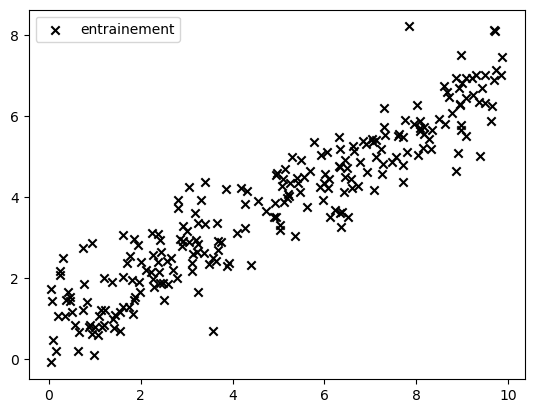

In [40]:
####### data visualization ###########
plt.figure()
plt.scatter(X[:,1],y, label="entrainement", marker='x',color='k')
plt.legend()

### 3.1 À vous de jouer !

- choisissons des valeurs pour les hyper-parametres `eta`, `MaxIter`, sans trop reflexchir pour le moment.
- choisissons une valeur, même idiote ou aléatoire, pour la valeur initiale des paramètres du vecteur `theta` (aussi noté $\vec{w}, ici$) (on l'a fait pour vous)
- créez un modèle, c.a.d. une fonction `modele` qui calcule $f_\theta(x)$. C'est une fonction qui prend en entrée $x$ (Des données) et le vecteur $w$ ($\vec w = \theta = $  les paramètres), et retourne la valeur prédite par le modèle (dans le cas de la régression linéaire, il n'y a pas de fonction d'activation).
- écrire une fonction `gradient_de_J`, qui donne le gradient de $J(\theta)$ en n'importe quel point $\theta$. 
- écrire une fonction `J`, qui donne la valeur de $J(\theta)$ en n'importe quel point $\theta$. 
- écrire une fonction `fit` qui fera la descente de gradient, c.a.d. fera une boucle sur `MaxIter` itérations ("époques"), chacune correspondant à une mise à jour de $\vec{w}$
- utilisez votre fonction `fit` pour optimiser la valeur des paramètres $\theta$
- Suivez l'évolution de l'erreur d'entrainement (=la valeur de la fonction coût $J$ au fur et à mesure des itérations), diminuez ou augmentez  `eta`, `MaxIter` selon les besoins.

In [41]:
eta = 0.1
MaxIter = 10

In [42]:
np.random.seed(7)
thetaInitial = np.random.random((2)) 
theta = thetaInitial.copy()
thetaInitial

array([0.07630829, 0.77991879])

#### Aide:

On montre qq exemples de produits possibles:

In [43]:

X.shape, y.shape, theta.shape, # model(theta, X).shape

((240, 2), (240,), (2,))

In [44]:
np.dot(y,X)

array([ 895.96803575, 5537.67606258])

In [45]:
y @ X

array([ 895.96803575, 5537.67606258])

In [46]:
np.matmul(y , X)

array([ 895.96803575, 5537.67606258])

In [47]:
## remarque: python peut aussi calculer le produit de deux tableaux ainsi:
## avec * , il calcule juste le produit point par point:
(thetaInitial*X).shape

(240, 2)

#### Aide:

definir la fonction qui pour une liste de points (par exemple du type de Xprime) renvoie 
la prediction du modele, le fameux f_theta(x), pour chaque x de la collection X.

In [48]:
# def model(theta, X):
#     return ??

In [49]:
model(theta, X)[:5]

NameError: name 'model' is not defined

In [32]:
# def grad_de_J(theta, X, y):
#     return ??


$$ \nabla J(X,Y,\Theta) =  \frac1N \sum_n^N (\vec{x}_n \vec{w} - y_n) \vec x_n $$


$$ J(X,Y,\Theta) = \frac12 \frac1N \sum_n^N (\vec{x}_n \vec{w} - y_n)^2 $$


In [33]:
# def J(theta, X, y):
#     return ??

In [34]:
J(theta, X, y)

NameError: name 'J' is not defined

In [35]:
# c'est juste une descente de gradient
def fit(eta, MaxIter, thetaInitial, X, y): 
    N = ??
    theta = thetaInitial.copy()
    trainError = np.zeros(MaxIter)
    
    for iteration in range(MaxIter):
        trainError[iteration] = ?? # c'est juste la valeur de J a cet instant
        theta -= ??
    return theta, trainError


SyntaxError: invalid syntax (1877211123.py, line 3)

In [ ]:
## il peut etre utile d'ajuster eta, MaxIter pour mieux faire
eta=??
MaxIter =??

In [ ]:
theta, trainError = fit(??)

In [ ]:
theta

In [ ]:
## suivi de l'evolution de l'erreur d'entrainement (au moins !)
## (on pourrait aussi suivre l'erreur sur l'ensemble de validation)
epoques = np.arange(MaxIter)
plt.figure(2)
plt.plot(epoques, trainError, label='train error')
plt.legend()

In [ ]:
# pour les tracés, on calcule la prediction de notre modele (apres le fit)
ypred = model(theta, X)

In [ ]:
plt.figure(1)
plt.scatter(X[:,1],y, label="train", marker='x',color='k')
plt.plot(X[:,1], ypred, color='teal', marker="o", ls="", label="prediction")
plt.legend()

In [ ]:
print("error d'entrainement:", np.mean(??)

In [ ]:
# pour comparaison:
np.std(y)

### Calculez l'erreur sur l'ensemble de test, et commentez le résultat